In [1]:
import numpy as np
import json
import scipy
import matplotlib.pyplot as plt
import ast, time
from IPython.display import clear_output

In [2]:
base_path = "/home/groups/ZuckermanLab/jalim/LI204601_INCUCYTE/"

## Get Cross-correlation and Nuc/Cyto Ratio at each frame along single-cell trajectories

In [3]:
def get_cellCycInfoTrajs(file_info):
    with open(file_info, 'r') as fp:
        lines = fp.readlines()

    nuc2cytoRatio = []
    CC_vals = []
    frames = []

    for line1, line2, line3 in zip(lines[::3], lines[1::3], lines[2::3]):
        line1 = np.array(line1.strip()[1:-1].split(', '), dtype=float)
        line2 = np.array(line2.strip()[1:-1].split(', '), dtype=float)
        line3 = np.array(line3.strip()[1:-1].split(', '), dtype=int)

        mask = ~np.isnan(line1)
        line1 = line1[mask]
        line2 = line2[mask]
        line3 = line3[mask]

        nuc2cytoRatio.append(line1)
        CC_vals.append(line2)
        frames.append(line3)

    return nuc2cytoRatio, CC_vals, frames

In [6]:
file_info=f"{base_path}cellCycInfoRawReporterImgs/LI204601_G_A2_2.dat"
n2c_ratio, cc_vals, frame_numbers = get_cellCycInfoTrajs(file_info)
nuc2Cyto_ratio = np.concatenate([np.array(sublist) for sublist in n2c_ratio])
cc_values = np.concatenate([np.array(sublist) for sublist in cc_vals])

## Data Visualization Using Histograms

<Figure size 640x480 with 0 Axes>

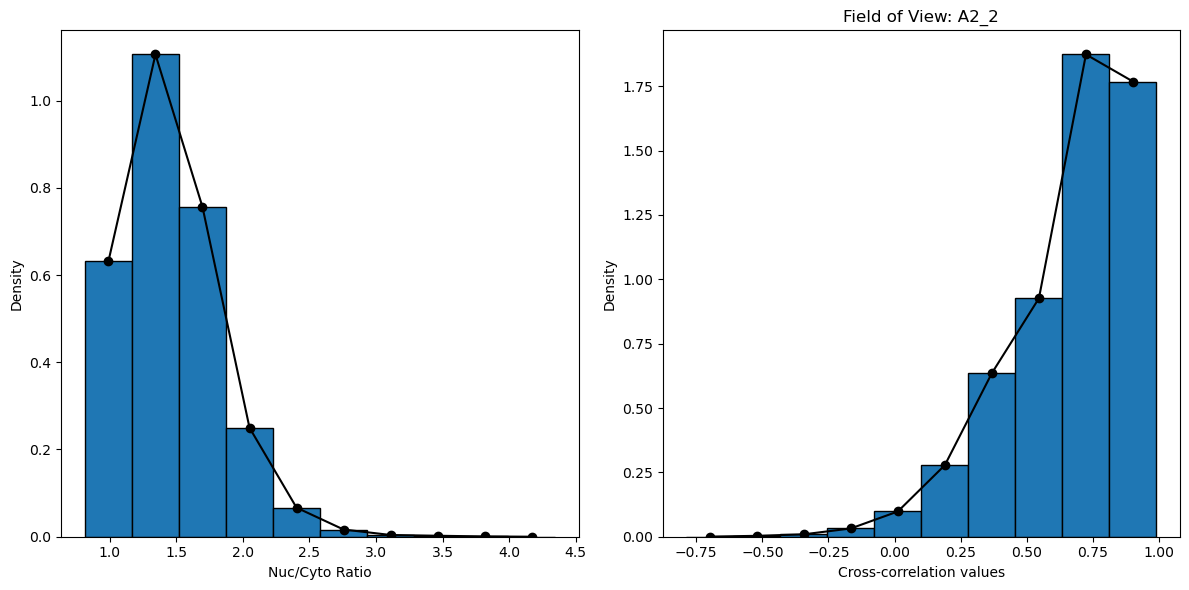

In [7]:
plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

n, bins = np.histogram(nuc2Cyto_ratio, density = True)
bin_midpoints = (bins[:-1] + bins[1:]) / 2 # Calculate the midpoints of the bins
axs[0].bar(bins[:-1], n, width = np.diff(bins), edgecolor = 'black', align = 'edge')
axs[0].plot(bin_midpoints, n, color = 'k', marker = 'o') # Plotting the line plot over the bar plot
axs[0].set_xlabel("Nuc/Cyto Ratio")
axs[0].set_ylabel("Density")

n, bins = np.histogram(cc_values, density = True)
bin_midpoints = (bins[:-1] + bins[1:]) / 2 # Calculate the midpoints of the bins
axs[1].bar(bins[:-1], n, width = np.diff(bins), edgecolor = 'black', align = 'edge')
axs[1].plot(bin_midpoints, n, color = 'k', marker = 'o') # Plotting the line plot over the bar plot
axs[1].set_xlabel("Cross-correlation values")
axs[1].set_ylabel("Density")
plt.title("Field of View: A2_2")
plt.tight_layout()
plt.savefig("distCCvalsNuc2CytoRatioA2_2.png", dpi=400, bbox_inches='tight')
#plt.show()

<Figure size 640x480 with 0 Axes>

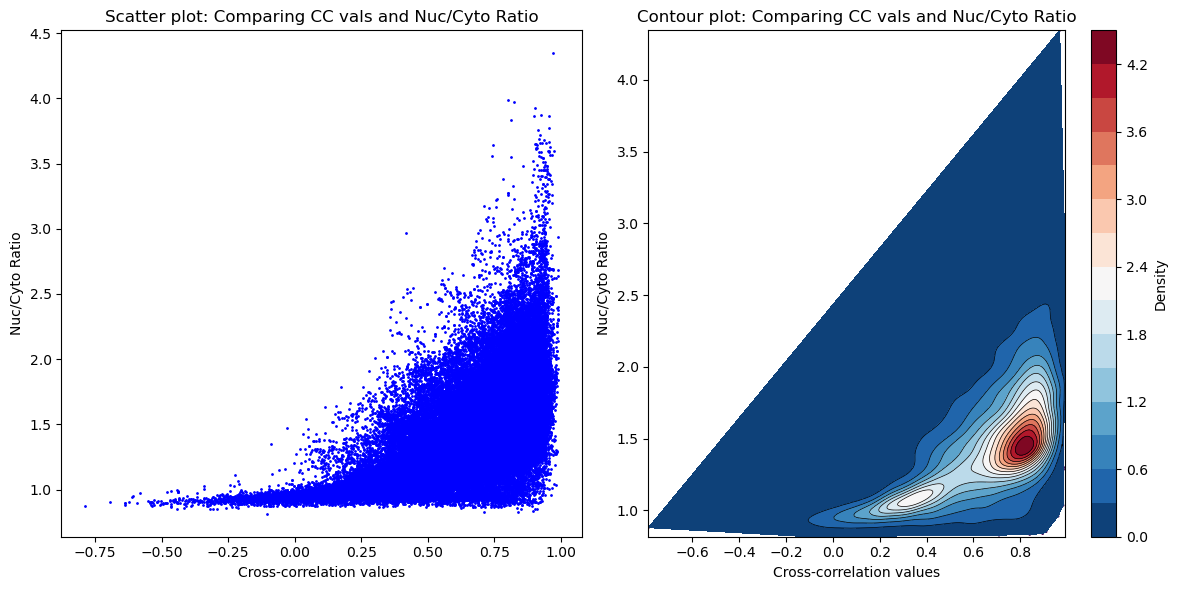

In [8]:
plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(cc_values, nuc2Cyto_ratio, s=1, color='b')
axs[0].set_title("Scatter plot: Comparing CC vals and Nuc/Cyto Ratio")
axs[0].set_xlabel("Cross-correlation values")
axs[0].set_ylabel("Nuc/Cyto Ratio")
xy = np.vstack([cc_values, nuc2Cyto_ratio])
xy = xy[:, np.isfinite(xy).all(axis=0)]
z = scipy.stats.gaussian_kde(xy)(xy)
sc = axs[1].scatter(cc_values, nuc2Cyto_ratio, c=z, s=1, label='Data Points')
axs[1].tricontour(cc_values, nuc2Cyto_ratio, z, levels=14, linewidths=0.5, colors='k')
contour_plot = axs[1].tricontourf(cc_values, nuc2Cyto_ratio, z, levels=14, cmap="RdBu_r")
fig.colorbar(contour_plot, ax=axs[1], label='Density')
axs[1].set_title("Contour plot: Comparing CC vals and Nuc/Cyto Ratio")
axs[1].set_xlabel("Cross-correlation values")
axs[1].set_ylabel("Nuc/Cyto Ratio")
plt.tight_layout()
plt.savefig("CCvalsNuc2CytoRatioA2_2.png", dpi=400, bbox_inches='tight')
#plt.show()

In [3]:
def get_cross_corr_all_frames(filename):
    cross_corr_data = []
    with open(filename, 'r') as file_in:
         for line in file_in:
             line = line.strip() # Remove any leading/trailing whitespace
             # If the line is not empty, convert it to a list and add it to arrays
             if line:
                 data = ast.literal_eval(line)
                 cross_corr_data.append(data)
    corr_all_trajs = []
    for fi in range(0, len(cross_corr_data), 2):
        cross_corr = np.array(cross_corr_data[fi], dtype=float)
        cross_corr = cross_corr[~np.isnan(cross_corr)] # Remove NaN values
        corr_all_trajs.append(cross_corr)
    flat_cross_corr = np.concatenate(corr_all_trajs)
    return flat_cross_corr

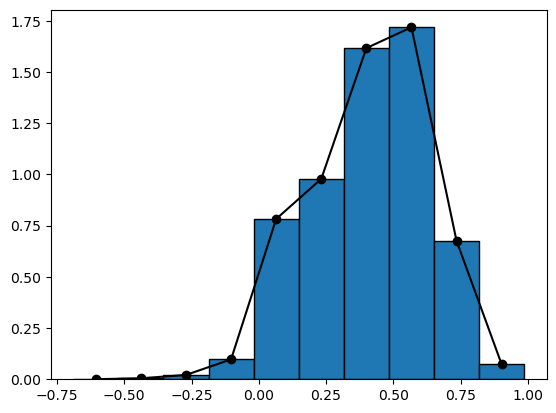

In [4]:
file_name = "LI204601_P_A2_2.dat"
file_info = f"{base_path}new_cal_CCvalsScaleImgs/{file_name}"
cross_corr_model1 = get_cross_corr_all_frames(file_info)
n, bins = np.histogram(cross_corr_model1, density = True)
bin_midpoints = (bins[:-1] + bins[1:]) / 2 # Calculate the midpoints of the bins
plt.clf()
plt.bar(bins[:-1], n, width = np.diff(bins), edgecolor = 'black', align = 'edge')
plt.plot(bin_midpoints, n, color = 'k', marker = 'o') # Plotting the line plot over the bar plot
plt.show()

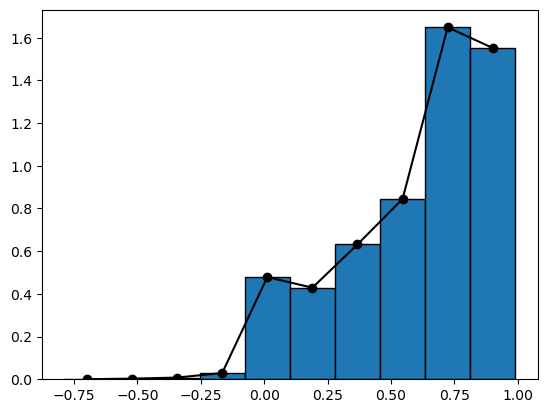

In [5]:
file_name = "LI204601_P_A2_2.dat"
file_info = f"{base_path}dcompCCtraj_states/{file_name}"
cross_corr_model2 = get_cross_corr_all_frames(file_info)
n, bins = np.histogram(cross_corr_model2, density = True)
bin_midpoints = (bins[:-1] + bins[1:]) / 2 # Calculate the midpoints of the bins
plt.clf()
plt.bar(bins[:-1], n, width = np.diff(bins), edgecolor = 'black', align = 'edge')
plt.plot(bin_midpoints, n, color = 'k', marker = 'o') # Plotting the line plot over the bar plot
plt.show()

<Figure size 640x480 with 0 Axes>

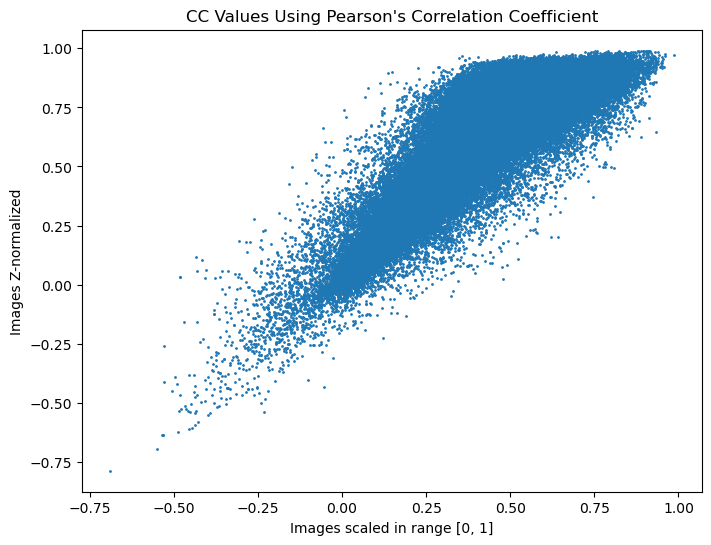

In [13]:
plt.clf()
plt.figure(figsize = (8, 6))
plt.scatter(cross_corr_model1, cross_corr_model2, s=1)
plt.title("CC Values Using Pearson's Correlation Coefficient")
plt.xlabel("Images scaled in range [0, 1]")
plt.ylabel("Images Z-normalized")
plt.show()

In [12]:
def get_cross_corr_all_frames(filename):
    cross_corr_data = []
    with open(filename, 'r') as file_in:
         for line in file_in:
             line = line.strip() # Remove any leading/trailing whitespace
             # If the line is not empty, convert it to a list and add it to arrays
             if line:
                 data = [float(x) if x != 'nan' else np.nan for x in line.strip('[]').split(',')] # Parse string into list
                 cross_corr_data.append(data)
    corr_all_trajs = []
    for fi in range(0, len(cross_corr_data), 2):
        cross_corr = np.array(cross_corr_data[fi], dtype=float)
        cross_corr = cross_corr[~np.isnan(cross_corr)] # Remove NaN values
        corr_all_trajs.append(cross_corr)
    flat_cross_corr = np.concatenate(corr_all_trajs)
    return flat_cross_corr

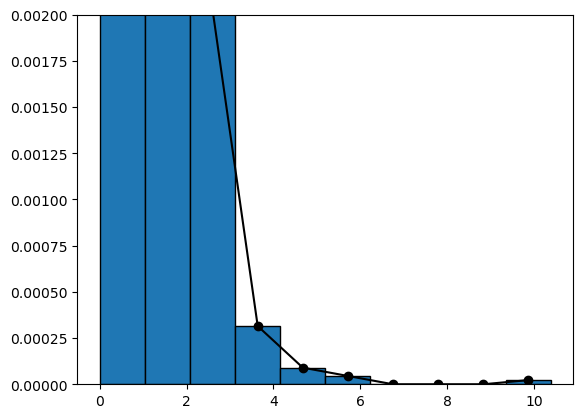

In [13]:
file_name = "LI204601_G_B2_4.dat"
file_info = f"{base_path}nuc2CytoRatioScaleImgs_new/{file_name}"
cross_corr_model_test = get_cross_corr_all_frames(file_info)
n, bins = np.histogram(cross_corr_model_test, density = True)
bin_midpoints = (bins[:-1] + bins[1:]) / 2 # Calculate the midpoints of the bins
plt.clf()
plt.bar(bins[:-1], n, width = np.diff(bins), edgecolor = 'black', align = 'edge')
plt.plot(bin_midpoints, n, color = 'k', marker = 'o') # Plotting the line plot over the bar plot
plt.ylim([0.0, 0.002])
plt.show()

In [16]:
def get_cross_corr_all_single_cell_trajs(filename):
      cross_corr_sctraj = []
      frame_num_sctraj = []
      with open(filename, 'r') as file_in:
          # Create an iterator over the file lines 
          file_iter = iter(file_in)
          try:
              while True:
                  # Read two lines at a time: Cross correlations & the corresponding frame numbers
                  line1 = next(file_iter).strip()
                  if line1:
                      data = [float(x) if x != 'nan' else np.nan for x in line1.strip('[]').split(',')] # Parse string into list
                      #data = ast.literal_eval(line1)
                      cross_corr_sctraj.append(data)
                      line2 = next(file_iter).strip()
                      # Parse line2 as a list of integers
                      frame_numbers = ast.literal_eval(line2)   
                      frame_num_sctraj.append(frame_numbers)
          except StopIteration:
              # End of file reached
              pass
      cross_corr_all_sctraj_file = cross_corr_sctraj
      frame_num_all_sctraj_file = frame_num_sctraj
      
      return cross_corr_all_sctraj_file, frame_num_all_sctraj_file

In [17]:
file_name = "LI204601_G_B2_4.dat"
file_info = f"{base_path}nuc2CytoRatioScaleImgs_new/{file_name}"
cross_correlations, frame_numbers = get_cross_corr_all_single_cell_trajs(file_info)

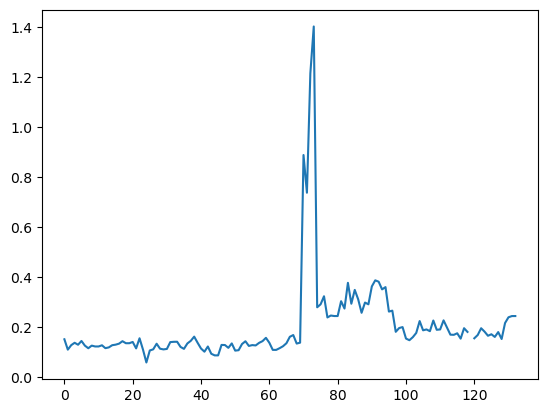

In [27]:
plt.plot(np.array(cross_correlations[89]))

In [ ]:
# Set image dimensions
height, width = 256, 256

# Generate image 1 (nucleus and cytoplasm)
img1 = np.zeros((height, width))
for i in range(height):
    for j in range(width):
        if (i-128)**2 + (j-128)**2 < 64**2:  # nucleus
            img1[i, j] = 100 + np.random.normal(0, 10)
        elif (i-128)**2 + (j-128)**2 < 128**2:  # cytoplasm
            img1[i, j] = 50 + np.random.normal(0, 5)
        else:  # background
            img1[i, j] = 10 + np.random.normal(0, 2)

# Generate image 2 (nucleus only)
img2 = np.zeros((height, width))
for i in range(height):
    for j in range(width):
        if (i-128)**2 + (j-128)**2 < 64**2:  # nucleus
            img2[i, j] = 150 + np.random.normal(0, 15)
        else:  # background
            img2[i, j] = 5 + np.random.normal(0, 1)

# Add some noise to the images
img1 += np.random.normal(0, 5, size=img1.shape)
img2 += np.random.normal(0, 5, size=img2.shape)

# Clip values to ensure they're within a valid range
img1 = np.clip(img1, 0, 255)
img2 = np.clip(img2, 0, 255)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Create a MinMaxScaler object

In [ ]:
def scale_image(image):
     
    img_scaled = scaler.fit_transform(image) # Fit the scaler to the image data and transform it
    img_scaled = img_scaled.reshape(image.shape) # Reshape the scaled image back to its original shape 

    return img_scaled

In [ ]:
image1 = scale_image(img1)
image2 = scale_image(img2)

In [ ]:
correlation_coefficient = np.corrcoef(image1.flatten(), image2.flatten())[0, 1]
n, bins = np.histogram(correlation_coefficient, density = True)
# Calculate the midpoints of the bins
bin_midpoints = (bins[:-1] + bins[1:]) / 2
plt.clf()
plt.bar(bins[:-1], n, width = np.diff(bins), edgecolor = 'black', align = 'edge')

In [ ]:
correlation_coefficient = np.corrcoef(image1, image2)[0, 1]
n, bins = np.histogram(correlation_coefficient, density = True)
# Calculate the midpoints of the bins
bin_midpoints = (bins[:-1] + bins[1:]) / 2
plt.clf()
plt.bar(bins[:-1], n, width = np.diff(bins), edgecolor = 'black', align = 'edge')

In [ ]:
sum_intensity_img1 = np.sum(image1)
sum_intensity_img2 = np.sum(image2)

In [ ]:
sum_intensity_img1 = np.sum(image1, axis=(0, 1))
sum_intensity_img2 = np.sum(image2, axis=(0, 1))

In [ ]:
ratio = sum_intensity_img2/sum_intensity_img1
ratio